# GPS, Conditioning, and Nonlinear Least Squares



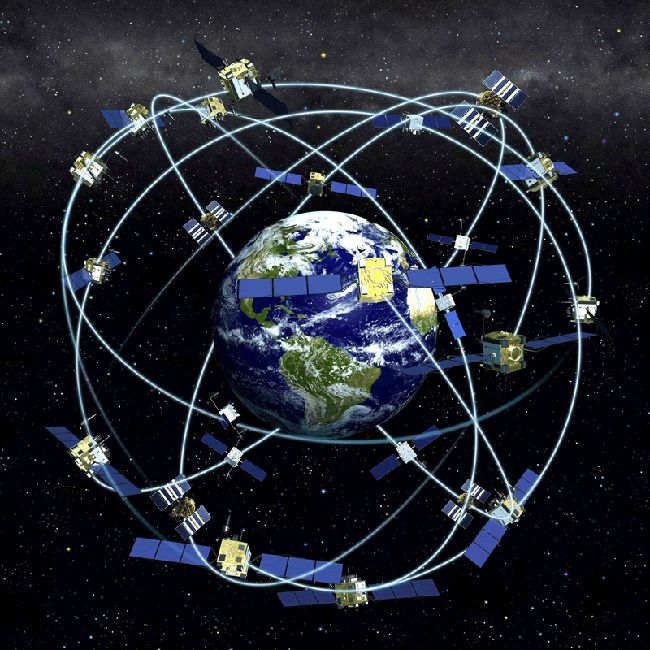

The Global Positioning System (GPS) consists of 24 satellites carrying atomic clocks, orbiting the earth at an altitude of 20,200 km. Four satellites in each of six planes, slanted at 55$^o$ with respect to the poles, make two revolutions per day. At any time, from any point on earth, five to eight satellites are in the direct line of sight. Each satellite has a simple mission: to transmit carefully synchronized signals from predetermined positions in space, to be picked up by GPS receivers on earth. The receivers use the information, with some mathematics (described shortly), to determine accurate $(x, y, z)$ coordinates of the receiver.

At a given instant, the receiver collects the synchronized signal from the ith satellite and determines its transmission time $t_i$ , the difference between the times the signal was transmitted and received. The nominal speed of the signal is the speed of light, $c \approx 299792.458$ km/sec. Multiplying transmission time by $c$ gives the distance of the satellite from the receiver, putting the receiver on the surface of a sphere centered at the satellite position and with radius cti . If three satellites are available, then three spheres are known, whose intersection consists of two points, as shown in Figure 4.16. One intersection point is the location of the receiver. The other is normally far from the earth’s surface and can be safely disregarded. In theory, the problem is reduced to computing this intersection, the common solution of three sphere equations.

However, there is a major problem with this analysis. First, although the transmissions from the satellites are timed nearly to the nanosecond by onboard atomic clocks, the clock in the typical low-cost receiver on earth has relatively poor accuracy. If we solve the three equations with slightly inaccurate timing, the calculated position could be wrong by several kilometers. Fortunately, there is a way to fix this problem. The price to pay is one extra satellite. Define d to be the difference between the synchronized time on the (now four) satellite clocks and the earth-bound receiver clock. Denote the location of satellite $i$ by $(A_i , B_i ,C_i )$. Then the true intersection point $(x, y, z)$ satisfies
$$r_1(x,y,z,d) = \sqrt{(x-A_1)^2 +(y-B_1)^2 +(z-C_1)^2  } - c (t_1-d) = 0$$
$$r_2(x,y,z,d) = \sqrt{(x-A_2)^2 +(y-B_2)^2 +(z-C_2)^2  } - c (t_2-d) = 0$$
$$r_3(x,y,z,d) = \sqrt{(x-A_3)^2 +(y-B_3)^2 +(z-C_3)^2  } - c (t_3-d) = 0$$
$$r_4(x,y,z,d) = \sqrt{(x-A_4)^2 +(y-B_4)^2 +(z-C_4)^2  } - c (t_4-d) = 0$$
to be solved for the unknowns $x, y, z,d$. Solving the system reveals not only the receiver location, but also the correct time from the satellite clocks, due to knowing d. Therefore, the inaccuracy in the GPS receiver clock can be fixed by using one extra satellite.

Geometrically speaking, four spheres may not have a common intersection point,
but they will if the radii are expanded or contracted by the right common amount.

The system (4.37) representing the intersection offour spheres is the three-dimensional analogue of (4.35), representing the intersection point of three circles in the plane. The system (4.37) can be seen to have two solutions (x, y, z,d). The equations can be equivalently written
$$(x-A_1)^2 +(y-B_1)^2 +(z-C_1)^2 = c^2 (t_1-d)^2 $$
$$(x-A_2)^2 +(y-B_2)^2 +(z-C_2)^2 = c^2 (t_2-d)^2 $$
$$(x-A_3)^2 +(y-B_3)^2 +(z-C_3)^2 = c^2 (t_3-d)^2 $$
$$(x-A_4)^2 +(y-B_4)^2 +(z-C_4)^2 = c^2 (t_4-d)^2 $$
Note that by subtracting the last three equations from the first, three linear equations are obtained. Each linear equation can be used to eliminate a variable $x, y, z$,and by substituting into any of the original equations, a quadratic equation in the single variable d results. Therefore, system (4.37) has at most two real solutions, and they can be found by the quadratic formula.

Two further problems emerge when GPS is deployed. First is the conditioning of the system ofequations (4.37). We will find that solving for $(x, y, z, d)$ is ill-conditioned when the satellites are bunched closely in the sky.

The second difficulty is that the transmission speed of the signals is not precisely $c$. The signals pass through 100 km of ionosphere and 10 km of troposphere, whose electromagnetic properties may affect the transmission speed. Furthermore, the signals may encounter obstacles on earth before reaching the receiver, an effect called multipath interference. To the extent that these obstacles have an equal impact on each satellite path, introducing the time correction $d$ on the right side of (4.37) helps. In general, however, this assumption is not viable and will lead us to add information from more satellites and consider applying Gauss–Newton to solve a least squares problem. Consider a three-dimensional coordinate system whose origin is the center of the earth (radius $\approx$ 6370 km). GPS receivers convert these coordinates into latitude, longitude, and elevation data for readout and more sophisticated mapping applications using global information system (GIS), a process we will not consider here.


# Suggested Activities

In [2]:
import numpy as np
from math import sqrt
from math import cos
from math import sin
from math import pi

#1.

Solve the system (4.37) by using Multivariate Newton's Method. Find the receiver position $(x, y, z)$ near earth and time correction $d$ for known, simultaneous satellite positions $(15600,7540,20140)$, $(18760,2750,18610)$, $(17610,14630,13480)$, $(19170,610,18390)$ in km, and measured time intervals $0.07074$, $0.07220$, $0.07690$, $0.07242$ in seconds, respectively. Set the initial vector to be $(x_0, y_0, z_0, d_0) = (0,0,6370,0)$. As a check, the answers are approximately $(x, y, z) = (−41.77271,−16.78919,6370.0596)$,and $d =−3.201566 \times 10^{-3}$ seconds.

In [3]:
r = 6367.4447                             # Earth's radius (km)
c = 299792.458                            # speed of light in the void/emptiness (km/sec)

# Below are the known simultaneous satellite positions (km) and measured
# time intervals (s).
A1 = 15600; B1 =  7540; C1 = 20140; t1 = 0.07074;
A2 = 18760; B2 =  2750; C2 = 18610; t2 = 0.07220;
A3 = 17610; B3 = 14630; C3 = 13480; t3 = 0.07690;
A4 = 19170; B4 =   610; C4 = 18390; t4 = 0.07242;

# Solve the system with Multivariate Newton's Method

F = lambda x: np.array(
    [ [ sqrt( ( x[0,0] - A1 ) ** 2 + ( x[1,0] - B1 ) ** 2 + ( x[2,0] - C1 ) ** 2 ) - c * (t1 - x[3,0] ) ],
      [ sqrt( ( x[0,0] - A2 ) ** 2 + ( x[1,0] - B2 ) ** 2 + ( x[2,0] - C2 ) ** 2 ) - c * (t2 - x[3,0] ) ],
      [ sqrt( ( x[0,0] - A3 ) ** 2 + ( x[1,0] - B3 ) ** 2 + ( x[2,0] - C3 ) ** 2 ) - c * (t3 - x[3,0] ) ],
      [ sqrt( ( x[0,0] - A4 ) ** 2 + ( x[1,0] - B4 ) ** 2 + ( x[2,0] - C4 ) ** 2 ) - c * (t4 - x[3,0] ) ] ] )

J  = lambda x: np.array(
    [ [ ( x[0,0] - A1 ) / sqrt( ( x[0,0] - A1 ) ** 2 + ( x[1,0] - B1 ) ** 2 + ( x[2,0] - C1 ) ** 2 ),
        ( x[1,0] - B1 ) / sqrt( ( x[0,0] - A1 ) ** 2 + ( x[1,0] - B1 ) ** 2 + ( x[2,0] - C1 ) ** 2 ),
        ( x[2,0] - C1 ) / sqrt( ( x[0,0] - A1 ) ** 2 + ( x[1,0] - B1 ) ** 2 + ( x[2,0] - C1 ) ** 2 ), c ],
      [ ( x[0,0] - A2 ) / sqrt( ( x[0,0] - A2 ) ** 2 + ( x[1,0] - B2 ) ** 2 + ( x[2,0] - C2 ) ** 2 ),
        ( x[1,0] - B2 ) / sqrt( ( x[0,0] - A2 ) ** 2 + ( x[1,0] - B2 ) ** 2 + ( x[2,0] - C2 ) ** 2 ),
        ( x[2,0] - C2 ) / sqrt( ( x[0,0] - A2 ) ** 2 + ( x[1,0] - B2 ) ** 2 + ( x[2,0] - C2 ) ** 2 ), c ],
      [ ( x[0,0] - A3 ) / sqrt( ( x[0,0] - A3 ) ** 2 + ( x[1,0] - B3 ) ** 2 + ( x[2,0] - C3 ) ** 2 ),
        ( x[1,0] - B3 ) / sqrt( ( x[0,0] - A3 ) ** 2 + ( x[1,0] - B3 ) ** 2 + ( x[2,0] - C3 ) ** 2 ),
        ( x[2,0] - C3 ) / sqrt( ( x[0,0] - A3 ) ** 2 + ( x[1,0] - B3 ) ** 2 + ( x[2,0] - C3 ) ** 2 ), c ],
      [ ( x[0,0] - A4 ) / sqrt( ( x[0,0] - A4 ) ** 2 + ( x[1,0] - B4 ) ** 2 + ( x[2,0] - C4 ) ** 2 ),
        ( x[1,0] - B4 ) / sqrt( ( x[0,0] - A4 ) ** 2 + ( x[1,0] - B4 ) ** 2 + ( x[2,0] - C4 ) ** 2 ),
        ( x[2,0] - C4 ) / sqrt( ( x[0,0] - A4 ) ** 2 + ( x[1,0] - B4 ) ** 2 + ( x[2,0] - C4 ) ** 2 ), c ] ] )

x_0 = 0; y_0 = 0; z_0 = 6370; d_0 = 0;
x_k = np.array( [[x_0], [y_0], [z_0], [d_0]] )  # Initial vector guess.

# First step of Newton's method
s = np.linalg.solve( J(x_k), - F(x_k) )
x_k = x_k + s;

# Second step of Newton's method
s = np.linalg.solve( J(x_k), - F(x_k) )
x_k = x_k + s;

print("x=", f"{x_k[0,0]: 10.5f}","   y=", f"{x_k[1,0]: 10.5f}","   z=", f"{x_k[2,0]: 10.4f}","   d=", f"{x_k[3,0]: 10.6e}")

x=  -41.77271    y=  -16.78919    z=  6370.0596    d= -3.201566e-03


## **You do NOT need to do anything with what is below**

---



#6.

Decide whether the GPS error and condition number can be reduced by adding satellites. Return to the unbunched satellite configuration of Step 4, and add four more. (At all times and at every position on earth, 5 to 12 GPS satellites are visible.) Design a Gauss–Newton iteration to solve the least squares system of eight equations in four variables $(x, y, z, d)$. What is a good initial vector? Find the maximum GPS position error, and estimate the condition number. Summarize your results from four unbunched, four bunched, and eight unbunched satellites. What configuration is best, and what is the maximum GPS error, in meters, that you should expect solely on the basis of satellite signals?

In [4]:
import random as ra

##### the Earth, their altitude is 20,200km and radius of Earth is 6370km

rho = 26570   # rho is the distance of the satellites from the center of the Earth, their altitude is 20,200km and radius of Earth is 6370km

x = 10; y = 20; z = 6370; # a position (from Earth's center) in km
d = 0.0001 # difference in second between the time of the (synchronized) atomic clock of the satellites and the time on our clock of our "low-cost" GPS receiver

phi = np.zeros( 8 )
theta = np.zeros( 8 )
A = np.zeros( 8 )
B = np.zeros( 8 )
C = np.zeros( 8 )
R = np.zeros( 8 )
t = np.zeros( 8 )
err_clock = np.zeros( 8 )


# Set-up the spherical coordinates for the satellites.

##### The code below sets up 8 satellites in the sky at
##### random spherical coordinate locations (phi,theta), then compute their
##### Cartesian coordinate in km, (A,B,C), then compute the distance, R, in km,
##### between us (the GPS receiver) and this satellite, then, based on this
##### distance and the speed of light, it computes the time that it takes for
##### the light to come from the satellite to us, and we also our time difference, d,
##### with our cheap GPS receiver clock to get t (measured time in seconds for time to travel)
##### then we also add the error in the atomic clock that are in the satellites
##### (at most +/- 10 nanoseconds). And that sets up the problem.

for i in range(0,8):

     phi[i]   = ra.random() * pi / 2
     theta[i] = ra.random() * 2 * pi

     A[i] = rho * cos( phi[i] ) * cos( theta[i] )
     B[i] = rho * cos( phi[i] ) * sin( theta[i] )
     C[i] = rho * sin( phi[i] )

     R[i] = sqrt( ( A[i] - x ) ** 2 + ( B[i] - y ) ** 2 + ( C[i] - z ) ** 2 )

     t[i] = d + R[i] / c

     err_clock[i] = 2e-8 * ra.random() - 1e-8

     t[i] = t[i] + err_clock[i]

print("Position of the eight satellites with spherical coordinate: (phi,theta) in degrees")
print("(", f"{phi[0]/pi*180:5.1f}", ",", f"{theta[0]/pi*180:5.1f}", "), ",
      "(", f"{phi[1]/pi*180:5.1f}", ",", f"{theta[1]/pi*180:5.1f}", "), ",
      "(", f"{phi[2]/pi*180:5.1f}", ",", f"{theta[2]/pi*180:5.1f}", "), ",
      "(", f"{phi[3]/pi*180:5.1f}", ",", f"{theta[3]/pi*180:5.1f}", "), ")
print("(", f"{phi[4]/pi*180:5.1f}", ",", f"{theta[4]/pi*180:5.1f}", "), ",
      "(", f"{phi[5]/pi*180:5.1f}", ",", f"{theta[5]/pi*180:5.1f}", "), ",
      "(", f"{phi[6]/pi*180:5.1f}", ",", f"{theta[6]/pi*180:5.1f}", "), ",
      "(", f"{phi[7]/pi*180:5.1f}", ",", f"{theta[7]/pi*180:5.1f}", "). ")
print("Remember that rho is ",f"{rho:5.1f}","km for all satellites.")
print("Error in satellites clock (in nanoseconds)")
print( f"{err_clock[0]*1e9: 5.2f}", f"{err_clock[1]*1e9: 5.2f}", f"{err_clock[2]*1e9: 5.2f}", f"{err_clock[3]*1e9: 5.2f}",
       f"{err_clock[4]*1e9: 5.2f}", f"{err_clock[5]*1e9: 5.2f}", f"{err_clock[6]*1e9: 5.2f}", f"{err_clock[7]*1e9: 5.2f}" )

F = lambda x: np.array(
    [ [ sqrt( ( x[0,0] - A[0] ) ** 2 + ( x[1,0] - B[0] ) ** 2 + ( x[2,0] - C[0] ) ** 2 ) - c * (t[0] - x[3,0] ) ],
      [ sqrt( ( x[0,0] - A[1] ) ** 2 + ( x[1,0] - B[1] ) ** 2 + ( x[2,0] - C[1] ) ** 2 ) - c * (t[1] - x[3,0] ) ],
      [ sqrt( ( x[0,0] - A[2] ) ** 2 + ( x[1,0] - B[2] ) ** 2 + ( x[2,0] - C[2] ) ** 2 ) - c * (t[2] - x[3,0] ) ],
      [ sqrt( ( x[0,0] - A[3] ) ** 2 + ( x[1,0] - B[3] ) ** 2 + ( x[2,0] - C[3] ) ** 2 ) - c * (t[3] - x[3,0] ) ],
      [ sqrt( ( x[0,0] - A[4] ) ** 2 + ( x[1,0] - B[4] ) ** 2 + ( x[2,0] - C[4] ) ** 2 ) - c * (t[4] - x[3,0] ) ],
      [ sqrt( ( x[0,0] - A[5] ) ** 2 + ( x[1,0] - B[5] ) ** 2 + ( x[2,0] - C[5] ) ** 2 ) - c * (t[5] - x[3,0] ) ],
      [ sqrt( ( x[0,0] - A[6] ) ** 2 + ( x[1,0] - B[6] ) ** 2 + ( x[2,0] - C[6] ) ** 2 ) - c * (t[6] - x[3,0] ) ],
      [ sqrt( ( x[0,0] - A[7] ) ** 2 + ( x[1,0] - B[7] ) ** 2 + ( x[2,0] - C[7] ) ** 2 ) - c * (t[7] - x[3,0] ) ]] )

J  = lambda x: np.array(
    [ [ ( x[0,0] - A[0] ) / sqrt( ( x[0,0] - A[0] ) ** 2 + ( x[1,0] - B[0] ) ** 2 + ( x[2,0] - C[0] ) ** 2 ),
        ( x[1,0] - B[0] ) / sqrt( ( x[0,0] - A[0] ) ** 2 + ( x[1,0] - B[0] ) ** 2 + ( x[2,0] - C[0] ) ** 2 ),
        ( x[2,0] - C[0] ) / sqrt( ( x[0,0] - A[0] ) ** 2 + ( x[1,0] - B[0] ) ** 2 + ( x[2,0] - C[0] ) ** 2 ), c ],
      [ ( x[0,0] - A[1] ) / sqrt( ( x[0,0] - A[1] ) ** 2 + ( x[1,0] - B[1] ) ** 2 + ( x[2,0] - C[1] ) ** 2 ),
        ( x[1,0] - B[1] ) / sqrt( ( x[0,0] - A[1] ) ** 2 + ( x[1,0] - B[1] ) ** 2 + ( x[2,0] - C[1] ) ** 2 ),
        ( x[2,0] - C[1] ) / sqrt( ( x[0,0] - A[1] ) ** 2 + ( x[1,0] - B[1] ) ** 2 + ( x[2,0] - C[1] ) ** 2 ), c ],
      [ ( x[0,0] - A[2] ) / sqrt( ( x[0,0] - A[2] ) ** 2 + ( x[1,0] - B[2] ) ** 2 + ( x[2,0] - C[2] ) ** 2 ),
        ( x[1,0] - B[2] ) / sqrt( ( x[0,0] - A[2] ) ** 2 + ( x[1,0] - B[2] ) ** 2 + ( x[2,0] - C[2] ) ** 2 ),
        ( x[2,0] - C[2] ) / sqrt( ( x[0,0] - A[2] ) ** 2 + ( x[1,0] - B[2] ) ** 2 + ( x[2,0] - C[2] ) ** 2 ), c ],
      [ ( x[0,0] - A[3] ) / sqrt( ( x[0,0] - A[3] ) ** 2 + ( x[1,0] - B[3] ) ** 2 + ( x[2,0] - C[3] ) ** 2 ),
        ( x[1,0] - B[3] ) / sqrt( ( x[0,0] - A[3] ) ** 2 + ( x[1,0] - B[3] ) ** 2 + ( x[2,0] - C[3] ) ** 2 ),
        ( x[2,0] - C[3] ) / sqrt( ( x[0,0] - A[3] ) ** 2 + ( x[1,0] - B[3] ) ** 2 + ( x[2,0] - C[3] ) ** 2 ), c ],
      [ ( x[0,0] - A[4] ) / sqrt( ( x[0,0] - A[4] ) ** 2 + ( x[1,0] - B[4] ) ** 2 + ( x[2,0] - C[4] ) ** 2 ),
        ( x[1,0] - B[4] ) / sqrt( ( x[0,0] - A[4] ) ** 2 + ( x[1,0] - B[4] ) ** 2 + ( x[2,0] - C[4] ) ** 2 ),
        ( x[2,0] - C[4] ) / sqrt( ( x[0,0] - A[4] ) ** 2 + ( x[1,0] - B[4] ) ** 2 + ( x[2,0] - C[4] ) ** 2 ), c ],
      [ ( x[0,0] - A[5] ) / sqrt( ( x[0,0] - A[5] ) ** 2 + ( x[1,0] - B[5] ) ** 2 + ( x[2,0] - C[5] ) ** 2 ),
        ( x[1,0] - B[5] ) / sqrt( ( x[0,0] - A[5] ) ** 2 + ( x[1,0] - B[5] ) ** 2 + ( x[2,0] - C[5] ) ** 2 ),
        ( x[2,0] - C[5] ) / sqrt( ( x[0,0] - A[5] ) ** 2 + ( x[1,0] - B[5] ) ** 2 + ( x[2,0] - C[5] ) ** 2 ), c ],
      [ ( x[0,0] - A[6] ) / sqrt( ( x[0,0] - A[6] ) ** 2 + ( x[1,0] - B[6] ) ** 2 + ( x[2,0] - C[6] ) ** 2 ),
        ( x[1,0] - B[6] ) / sqrt( ( x[0,0] - A[6] ) ** 2 + ( x[1,0] - B[6] ) ** 2 + ( x[2,0] - C[6] ) ** 2 ),
        ( x[2,0] - C[6] ) / sqrt( ( x[0,0] - A[6] ) ** 2 + ( x[1,0] - B[6] ) ** 2 + ( x[2,0] - C[6] ) ** 2 ), c ],
      [ ( x[0,0] - A[7] ) / sqrt( ( x[0,0] - A[7] ) ** 2 + ( x[1,0] - B[7] ) ** 2 + ( x[2,0] - C[7] ) ** 2 ),
        ( x[1,0] - B[7] ) / sqrt( ( x[0,0] - A[7] ) ** 2 + ( x[1,0] - B[7] ) ** 2 + ( x[2,0] - C[7] ) ** 2 ),
        ( x[2,0] - C[7] ) / sqrt( ( x[0,0] - A[7] ) ** 2 + ( x[1,0] - B[7] ) ** 2 + ( x[2,0] - C[7] ) ** 2 ), c ] ]  )


x_0 = np.array( [ [0.], [0.], [6370.], [0.    ]] )                                   # Initial vector guess.
x__ = np.array( [ [x], [y], [z], [d]] )                                   # exact solution

# Initializing Gauss Newton's method
x_k = x_0
print("|| F(x) || = ", f"{np.linalg.norm(F(x_0),np.infty):6.2e}", "|| x_0 - x__ || = ", f"{np.linalg.norm(x_0-x__,np.infty):6.2e}" )

# First step of Gauss Newton's method
s = np.linalg.lstsq( J(x_k), - F(x_k), rcond=None)[0]
x_k = x_k + s;
print("|| F(x) || = ", f"{np.linalg.norm(F(x_k),np.infty):6.2e}", "|| x_0 - x__ || = ", f"{np.linalg.norm(x_k-x__,np.infty):6.2e}" )

# Second step of Gauss Newton's method
s = np.linalg.lstsq( J(x_k), - F(x_k), rcond=None)[0]
x_k = x_k + s;
print("|| F(x) || = ", f"{np.linalg.norm(F(x_k),np.infty):6.2e}", "|| x_0 - x__ || = ", f"{np.linalg.norm(x_k-x__,np.infty):6.2e}" )

print("with eight satellites");
print("my (true) position (in km):    ",
      "x=", f"{x__[0,0]: 8.3f}",
      "y=", f"{x__[1,0]: 8.3f}",
      "z=", f"{x__[2,0]: 8.3f}",
      "my (true) time delay (in sec):   d=", f"{x__[3,0]: 14.10f}")
print("my computed position (in km):  ",
      "x=", f"{x_k[0,0]: 8.3f}",
      "y=", f"{x_k[1,0]: 8.3f}",
      "z=", f"{x_k[2,0]: 8.3f}",
      "my computed time delay (in sec): d=", f"{x_k[3,0]: 14.10f}")
print("  error in position (in meters) = ",
       f"{1e3*sqrt(( x__[0,0] - x_k[0,0] )**2 + ( x__[1,0] - x_k[1,0] )**2 + ( x__[2,0] - x_k[2,0] )**2 ):8.3f}",
       "  error in time (in sec) = ", f"{abs(x__[3,0] - x_k[3,0]):6.2e}" )

Position of the eight satellites with spherical coordinate: (phi,theta) in degrees
(  24.6 , 115.8 ),  (  17.0 ,  16.9 ),  (  72.5 ,  23.0 ),  (  21.8 , 178.0 ), 
(   2.0 , 249.6 ),  (  74.6 ,  63.6 ),  (  41.3 , 294.3 ),  (  88.7 , 346.8 ). 
Remember that rho is  26570.0 km for all satellites.
Error in satellites clock (in nanoseconds)
 4.17  6.58  2.52 -7.42 -9.15 -5.69  8.90 -0.31
|| F(x) || =  5.18e+01 || x_0 - x__ || =  2.00e+01
|| F(x) || =  1.39e-02 || x_0 - x__ || =  7.19e-03
|| F(x) || =  2.47e-03 || x_0 - x__ || =  2.29e-03
with eight satellites
my (true) position (in km):     x=   10.000 y=   20.000 z=  6370.000 my (true) time delay (in sec):   d=   0.0001000000
my computed position (in km):   x=    9.998 y=   19.999 z=  6370.000 my computed time delay (in sec): d=   0.0001000005
  error in position (in meters) =     2.435   error in time (in sec) =  4.58e-10


## **You do NOT need to do anything with what is below**

---



This is an example of how to add satellites automatically and see that as we add satellites we increase our accuracy.

In [ ]:
rho = 26570   # rho is the distance of the satellites from the center of the Earth, their altitude is 20,200km and radius of Earth is 6370km
x = 10; y = 20; z = 6370; # a position (from Earth's center) in km
d = 0.0001 # difference in second between the time of the (synchronized) atomic clock of the satellites and the time on our clock of our "low-cost" GPS receiver

phi = np.zeros( 8 )
theta = np.zeros( 8 )
A = np.zeros( 8 )
B = np.zeros( 8 )
C = np.zeros( 8 )
R = np.zeros( 8 )
t = np.zeros( 8 )
err_clock = np.zeros( 8 )

# Set-up the spherical coordinates for the satellites.
for i in range(0,8):

    phi[i]   = ra.random() * pi / 2
    theta[i] = ra.random() * 2 * pi

    #phi[i]   = ra.random() * pi / 4
    #theta[i] = ra.random() * pi / 10

    A[i] = rho * cos( phi[i] ) * cos( theta[i] )
    B[i] = rho * cos( phi[i] ) * sin( theta[i] )
    C[i] = rho * sin( phi[i] )

    R[i] = sqrt( ( A[i] - x ) ** 2 + ( B[i] - y ) ** 2 + ( C[i] - z ) ** 2 )

    t[i] = d + R[i] / c

    err_clock[i] = 2e-8 * ra.random() - 1e-8

    t[i] = t[i] + err_clock[i]

print("Position of the eight satellites with spherical coordinate: (phi,theta) in degrees")
print("(", f"{phi[0]/pi*180:5.1f}", ",", f"{theta[0]/pi*180:5.1f}", "), ",
      "(", f"{phi[1]/pi*180:5.1f}", ",", f"{theta[1]/pi*180:5.1f}", "), ",
      "(", f"{phi[2]/pi*180:5.1f}", ",", f"{theta[2]/pi*180:5.1f}", "), ",
      "(", f"{phi[3]/pi*180:5.1f}", ",", f"{theta[3]/pi*180:5.1f}", "), ")
print("(", f"{phi[4]/pi*180:5.1f}", ",", f"{theta[4]/pi*180:5.1f}", "), ",
      "(", f"{phi[5]/pi*180:5.1f}", ",", f"{theta[5]/pi*180:5.1f}", "), ",
      "(", f"{phi[6]/pi*180:5.1f}", ",", f"{theta[6]/pi*180:5.1f}", "), ",
      "(", f"{phi[7]/pi*180:5.1f}", ",", f"{theta[7]/pi*180:5.1f}", "). ")
print("Remember that rho is ",f"{rho:5.1f}","km for all satellites.")
print("Error in satellites clock (in nanoseconds)")
print( f"{err_clock[0]*1e9: 5.2f}", f"{err_clock[1]*1e9: 5.2f}", f"{err_clock[2]*1e9: 5.2f}", f"{err_clock[3]*1e9: 5.2f}",
       f"{err_clock[4]*1e9: 5.2f}", f"{err_clock[5]*1e9: 5.2f}", f"{err_clock[6]*1e9: 5.2f}", f"{err_clock[7]*1e9: 5.2f}" )

def find_position_with_n_satellites( n ):

    def F(x):
        Fx = np.zeros( [ n, 1 ] )
        for i in range(0,n):
            Fx[i,0] = sqrt( ( x[0,0] - A[i] ) ** 2 + ( x[1,0] - B[i] ) ** 2 + ( x[2,0] - C[i] ) ** 2 ) - c * (t[i] - x[3,0] )
        return Fx

    def J(x):
        Jx = np.zeros( [ n, 4 ] )
        for i in range(0,n):
            Jx[i,0] = ( x[0,0] - A[i] ) / sqrt( ( x[0,0] - A[i] ) ** 2 + ( x[1,0] - B[i] ) ** 2 + ( x[2,0] - C[i] ) ** 2 )
            Jx[i,1] = ( x[0,0] - B[i] ) / sqrt( ( x[0,0] - A[i] ) ** 2 + ( x[1,0] - B[i] ) ** 2 + ( x[2,0] - C[i] ) ** 2 )
            Jx[i,2] = ( x[0,0] - C[i] ) / sqrt( ( x[0,0] - A[i] ) ** 2 + ( x[1,0] - B[i] ) ** 2 + ( x[2,0] - C[i] ) ** 2 )
            Jx[i,3] = c
        return Jx

    x_0 = np.array( [ [0.], [0.], [6370.], [0.    ]] )   # Initial vector guess.
    x__ = np.array( [ [x], [y], [z], [d]] )              # exact solution

#   Initialize Gauss Newton
    x_k = x_0
    print("|| F(x) || = ", f"{np.linalg.norm(F(x_0),np.infty):6.2e}", "|| x_0 - x__ || = ", f"{np.linalg.norm(x_0-x__,np.infty):6.2e}" )

#   do 10 steps of Gauss Newton (the number of steps, 10, is arbritrary)
    for i in range(0,10):
        s = np.linalg.lstsq( J(x_k), - F(x_k), rcond=None)[0]
        x_k = x_k + s;
        print("|| F(x) || = ", f"{np.linalg.norm(F(x_k),np.infty):6.2e}", "|| x_0 - x__ || = ", f"{np.linalg.norm(x_k-x__,np.infty):6.2e}" )

    return x_k

for nb_satellites in range(4,9):

    print("\nwith ", f"{nb_satellites:2d}", " satellites")

    x_k = find_position_with_n_satellites( nb_satellites )

    print("my (true) position (in km):    ",
      "x=", f"{x__[0,0]: 8.3f}",
      "y=", f"{x__[1,0]: 8.3f}",
      "z=", f"{x__[2,0]: 8.3f}",
      "my (true) time delay (in sec):   d=", f"{x__[3,0]: 14.10f}")
    print("my computed position (in km):  ",
      "x=", f"{x_k[0,0]: 8.3f}",
      "y=", f"{x_k[1,0]: 8.3f}",
      "z=", f"{x_k[2,0]: 8.3f}",
      "my computed time delay (in sec): d=", f"{x_k[3,0]: 14.10f}")
    print("  error in position (in meters) = ",
          f"{1e3*sqrt(( x__[0,0] - x_k[0,0] )**2 + ( x__[1,0] - x_k[1,0] )**2 + ( x__[2,0] - x_k[2,0] )**2 ):8.3f}",
          "  error in time (in sec) = ", f"{abs(x__[3,0] - x_k[3,0]):6.2e}" )

Position of the eight satellites with spherical coordinate: (phi,theta) in degrees
(  38.1 , 132.3 ),  (  48.7 , 303.4 ),  (  11.0 , 338.2 ),  (  19.0 , 257.9 ), 
(  89.1 , 345.9 ),  (  24.2 , 142.6 ),  (  68.9 , 270.9 ),  (  49.5 , 238.0 ). 
Remember that rho is  26570.0 km for all satellites.
Error in satellites clock (in nanoseconds)
-3.04  4.19  8.20  6.69 -8.11 -4.98 -0.62 -3.91

with   4  satellites
|| F(x) || =  5.16e+01 || x_0 - x__ || =  2.00e+01
|| F(x) || =  8.39e-03 || x_0 - x__ || =  6.49e-03
|| F(x) || =  1.70e-03 || x_0 - x__ || =  1.35e-03
|| F(x) || =  1.04e-04 || x_0 - x__ || =  1.71e-03
|| F(x) || =  6.40e-06 || x_0 - x__ || =  1.73e-03
|| F(x) || =  3.93e-07 || x_0 - x__ || =  1.73e-03
|| F(x) || =  2.42e-08 || x_0 - x__ || =  1.73e-03
|| F(x) || =  1.48e-09 || x_0 - x__ || =  1.73e-03
|| F(x) || =  8.73e-11 || x_0 - x__ || =  1.73e-03
|| F(x) || =  7.28e-12 || x_0 - x__ || =  1.73e-03
|| F(x) || =  3.64e-12 || x_0 - x__ || =  1.73e-03
my (true) position (in km):   